<a href="https://colab.research.google.com/github/mridul-eecs/Human-Activity-Recognition/blob/master/humanActivityRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bussiness Problem


### Description

Problem Statement: The project solves classification of human activities which are divided into 6 classes

1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING

Data Source: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

Algorithmic objectives and constraints:

1. Low latency requirement
2. Interpretability is not required
3. Errors are not very costly
4. Probability of a data-point belonging to each class is needed

Performance Metrics:

1. Multi class log loss
2. Accuracy
3. Multi class Confusion matrix

## Downloading and understanding the dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# downloaded data from https://archive.ics.uci.edu/ml/machine-learning-databases/00240/
import os
BASEDIR= 'drive/My Drive/UCI HAR Dataset/UCI HAR Dataset'
print(os.listdir(BASEDIR+ '/train'))
# inside the train and test folder we have 2 kinds of data
# Raw intertial signals from the accelerometer and gyroscope 
# And the feature engineered data from the domain experts
# We are going to utilise both kinds of data
# Firstly we will understand feature engineered data and apply classical machine learning on it
# Thereafter we will utilise deep learning on raw inertial data and compare both techniqes

['Inertial Signals', 'y_train.txt', 'subject_train.txt', 'X_train.txt']


In [0]:
# tablifying file contents into dataframe for exploratory data analysis
import pandas as pd
# reading feature names:
with open(BASEDIR + '/features.txt') as f:
  features= f.readlines()
  # [:-1] used to remove '\n' from the end of each feature
  features= [f[:-1].replace('-', '').replace(' ', '').replace(',', '') for f in features]

train_df= pd.read_csv(BASEDIR + '/train/X_train.txt', delim_whitespace=True, header= None, names= features)
# adding labels in train_df
labels= pd.read_csv(BASEDIR + '/train/y_train.txt', delimiter= '\n', header= None)
# labels.describe()
train_df['LABELS']= labels
activities= {1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'}
train_df['ACTIVITY'] = labels[0].map(activities)
train_df.head(5)


,1tBodyAccmean()X,2tBodyAccmean()Y,3tBodyAccmean()Z,4tBodyAccstd()X,5tBodyAccstd()Y,6tBodyAccstd()Z,7tBodyAccmad()X,8tBodyAccmad()Y,9tBodyAccmad()Z,10tBodyAccmax()X,11tBodyAccmax()Y,12tBodyAccmax()Z,13tBodyAccmin()X,14tBodyAccmin()Y,15tBodyAccmin()Z,16tBodyAccsma(),17tBodyAccenergy()X,18tBodyAccenergy()Y,19tBodyAccenergy()Z,20tBodyAcciqr()X,21tBodyAcciqr()Y,22tBodyAcciqr()Z,23tBodyAccentropy()X,24tBodyAccentropy()Y,25tBodyAccentropy()Z,26tBodyAccarCoeff()X1,27tBodyAccarCoeff()X2,28tBodyAccarCoeff()X3,29tBodyAccarCoeff()X4,30tBodyAccarCoeff()Y1,31tBodyAccarCoeff()Y2,32tBodyAccarCoeff()Y3,33tBodyAccarCoeff()Y4,34tBodyAccarCoeff()Z1,35tBodyAccarCoeff()Z2,36tBodyAccarCoeff()Z3,37tBodyAccarCoeff()Z4,38tBodyAcccorrelation()XY,39tBodyAcccorrelation()XZ,40tBodyAcccorrelation()YZ,...,524fBodyBodyAccJerkMagentropy(),525fBodyBodyAccJerkMagmaxInds,526fBodyBodyAccJerkMagmeanFreq(),527fBodyBodyAccJerkMagskewness(),528fBodyBodyAccJerkMagkurtosis(),529fBodyBodyGyroMagmean(),530fBodyBodyGyroMagstd(),531fBodyBodyGyroMagmad(),532fBodyBodyGyroMagmax(),533fBodyBodyGyroMagmin(),534fBodyBodyGyroMagsma(),535fBodyBodyGyroMagenergy(),536fBodyBodyGyroMagiqr(),537fBodyBodyGyroMagentropy(),538fBodyBodyGyroMagmaxInds,539fBodyBodyGyroMagmeanFreq(),540fBodyBodyGyroMagskewness(),541fBodyBodyGyroMagkurtosis(),542fBodyBodyGyroJerkMagmean(),543fBodyBodyGyroJerkMagstd(),544fBodyBodyGyroJerkMagmad(),545fBodyBodyGyroJerkMagmax(),546fBodyBodyGyroJerkMagmin(),547fBodyBodyGyroJerkMagsma(),548fBodyBodyGyroJerkMagenergy(),549fBodyBodyGyroJerkMagiqr(),550fBodyBodyGyroJerkMagentropy(),551fBodyBodyGyroJerkMagmaxInds,552fBodyBodyGyroJerkMagmeanFreq(),553fBodyBodyGyroJerkMagskewness(),554fBodyBodyGyroJerkMagkurtosis(),555angle(tBodyAccMeangravity),556angle(tBodyAccJerkMean)gravityMean),557angle(tBodyGyroMeangravityMean),558angle(tBodyGyroJerkMeangravityMean),559angle(XgravityMean),560angle(YgravityMean),561angle(ZgravityMean),LABELS,ACTIVITY
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.7

# Exploratory Data Analysis
### Checking data imbalance

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ACTIVITY, dtype: int64


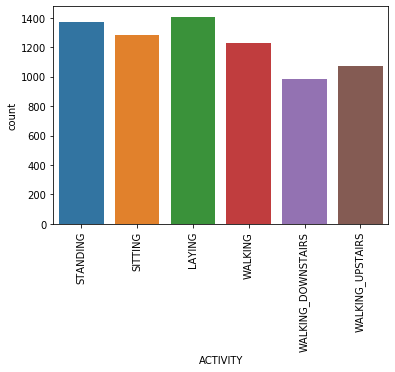

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
labels= train_df['ACTIVITY']
print(labels.value_counts())
sns.countplot(labels)
plt.xticks(rotation= 90)
plt.show()

In [0]:
# The dataset looks almost balanced we have a little less staircasing data compared to others but that's fine

### Univariate Analysis

In [0]:
# As per domain knowledge, there are 2 kinds of activities, static and dynamic
# Static Activities: Sitting, Standing, Laying
# Dynamic Activities: Walking, UP and Down Staircasing
# Plotting the univariate analysis
for c in train_df.columns:
  print(c)

1tBodyAccmean()X
2tBodyAccmean()Y
3tBodyAccmean()Z
4tBodyAccstd()X
5tBodyAccstd()Y
6tBodyAccstd()Z
7tBodyAccmad()X
8tBodyAccmad()Y
9tBodyAccmad()Z
10tBodyAccmax()X
11tBodyAccmax()Y
12tBodyAccmax()Z
13tBodyAccmin()X
14tBodyAccmin()Y
15tBodyAccmin()Z
16tBodyAccsma()
17tBodyAccenergy()X
18tBodyAccenergy()Y
19tBodyAccenergy()Z
20tBodyAcciqr()X
21tBodyAcciqr()Y
22tBodyAcciqr()Z
23tBodyAccentropy()X
24tBodyAccentropy()Y
25tBodyAccentropy()Z
26tBodyAccarCoeff()X1
27tBodyAccarCoeff()X2
28tBodyAccarCoeff()X3
29tBodyAccarCoeff()X4
30tBodyAccarCoeff()Y1
31tBodyAccarCoeff()Y2
32tBodyAccarCoeff()Y3
33tBodyAccarCoeff()Y4
34tBodyAccarCoeff()Z1
35tBodyAccarCoeff()Z2
36tBodyAccarCoeff()Z3
37tBodyAccarCoeff()Z4
38tBodyAcccorrelation()XY
39tBodyAcccorrelation()XZ
40tBodyAcccorrelation()YZ
41tGravityAccmean()X
42tGravityAccmean()Y
43tGravityAccmean()Z
44tGravityAccstd()X
45tGravityAccstd()Y
46tGravityAccstd()Z
47tGravityAccmad()X
48tGravityAccmad()Y
49tGravityAccmad()Z
50tGravityAccmax()X
51tGravityAccmax

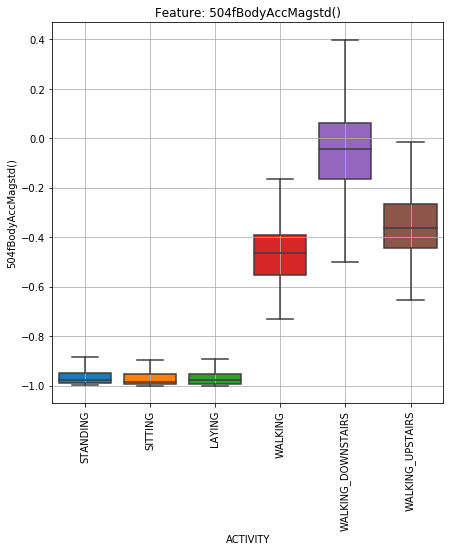

In [0]:
# feature 504: '504fBodyAccMagstd'
# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
sns.boxplot(x='ACTIVITY', y='504fBodyAccMagstd()',data=train_df, showfliers=False, saturation=1)
plt.title('Feature: 504fBodyAccMagstd()')
plt.xticks(rotation= 90)
plt.grid()

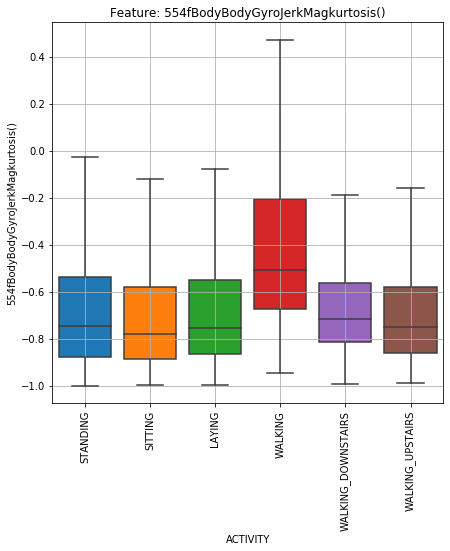

In [0]:
# feature 554: '554fBodyBodyGyroJerkMagkurtosis()'
# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
sns.boxplot(x='ACTIVITY', y='554fBodyBodyGyroJerkMagkurtosis()',data=train_df, showfliers=False, saturation=1)
plt.title('Feature: 554fBodyBodyGyroJerkMagkurtosis()')
plt.xticks(rotation= 90)
plt.grid()

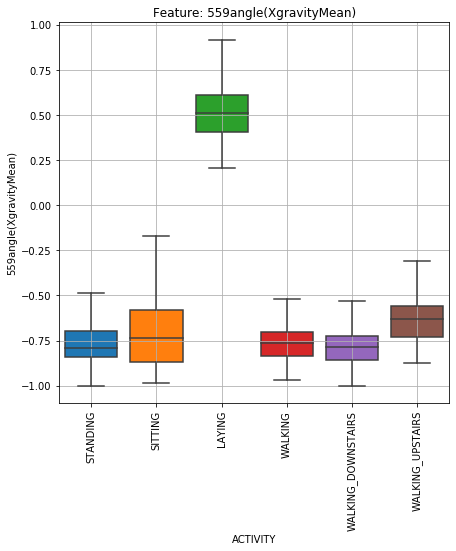

In [0]:
# feature 559: '559angle(XgravityMean)'
# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
sns.boxplot(x='ACTIVITY', y='559angle(XgravityMean)',data=train_df, showfliers=False, saturation=1)
plt.title('Feature: 559angle(XgravityMean)')
plt.xticks(rotation= 90)
plt.grid()

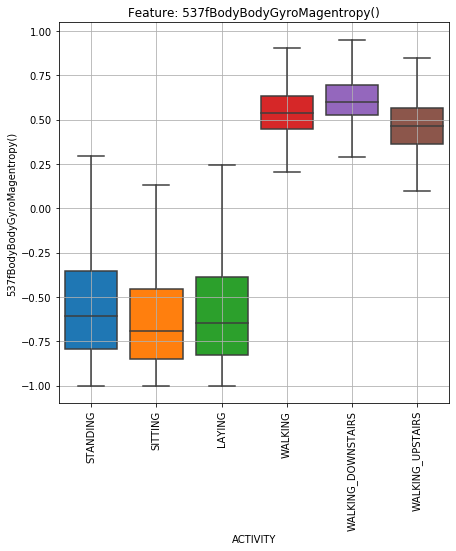

In [0]:
# feature 537: '537fBodyBodyGyroMagentropy()'
# we will plot box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
sns.boxplot(x='ACTIVITY', y='537fBodyBodyGyroMagentropy()',data=train_df, showfliers=False, saturation=1)
plt.title('Feature: 537fBodyBodyGyroMagentropy()')
plt.xticks(rotation= 90)
plt.grid()

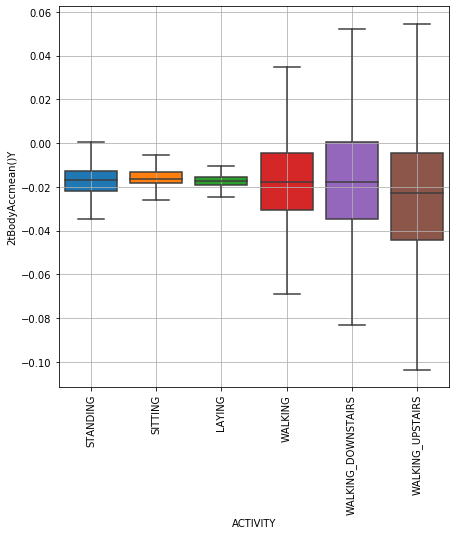

In [0]:
# feature 1: '2tBodyAccmean()Y'
# we will utilize box and whisker plot for the univariate analysis
plt.figure(figsize= (7, 7))
sns.boxplot(x='ACTIVITY', y='2tBodyAccmean()Y',data=train_df, showfliers=False, saturation=1)
plt.xticks(rotation= 90)
plt.grid()
# Based on simple visual of the boxplots, it can be observed that the '2tBodyAccmean()Y' feature is not proving
# enough information to simply draw a threshold and classify using simple thresholding,

KeyboardInterrupt: ignored

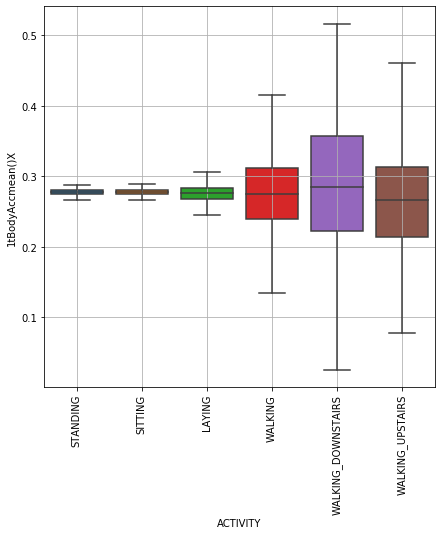

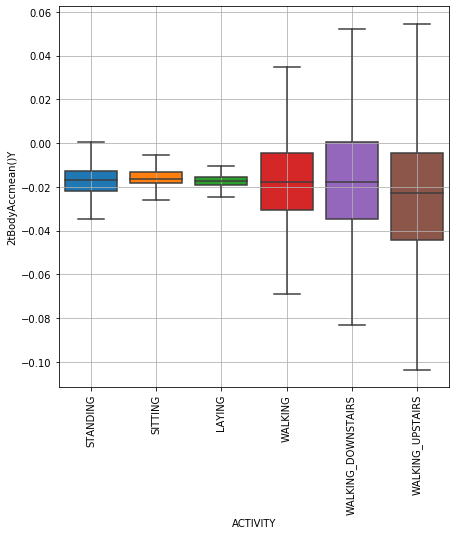

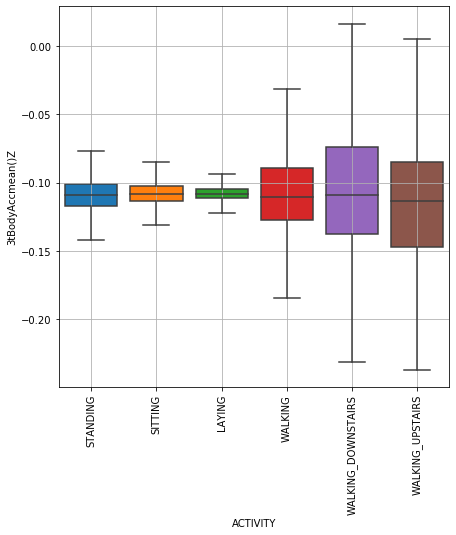

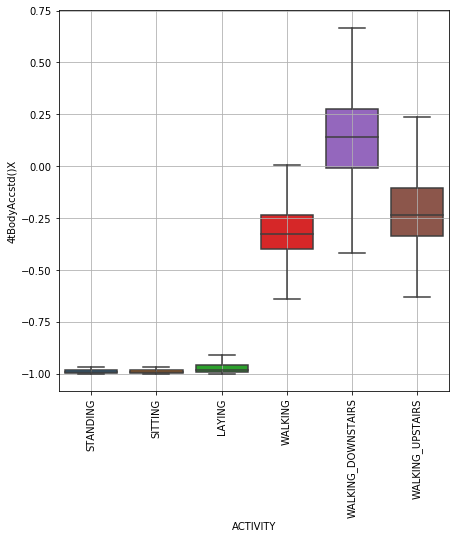

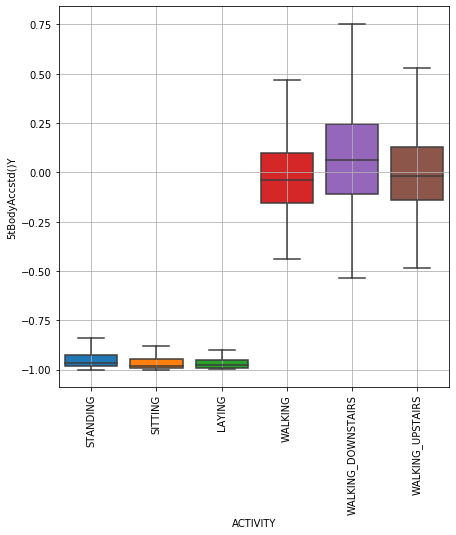

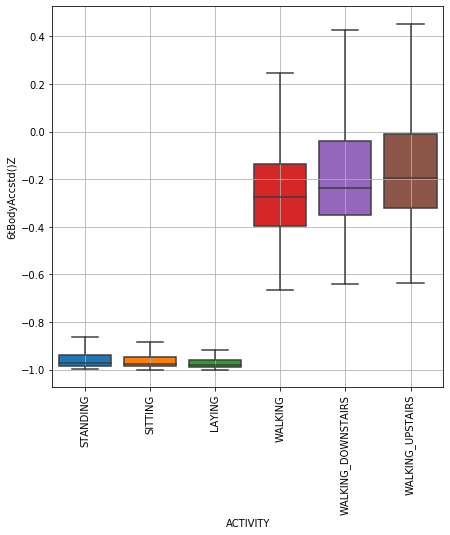

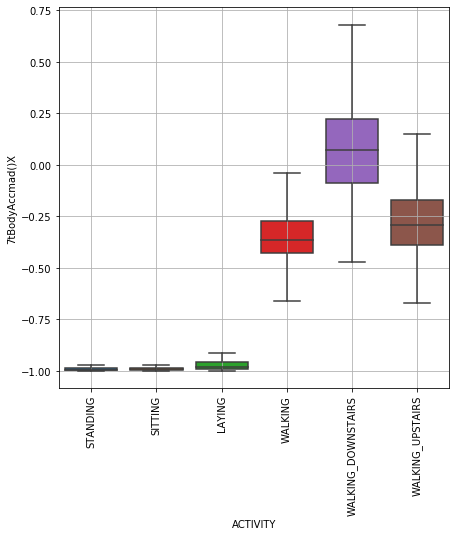

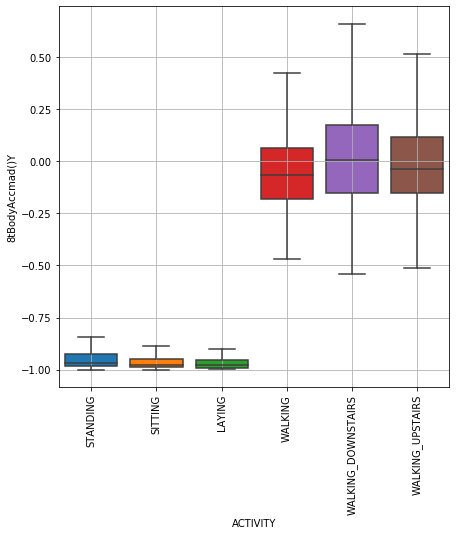

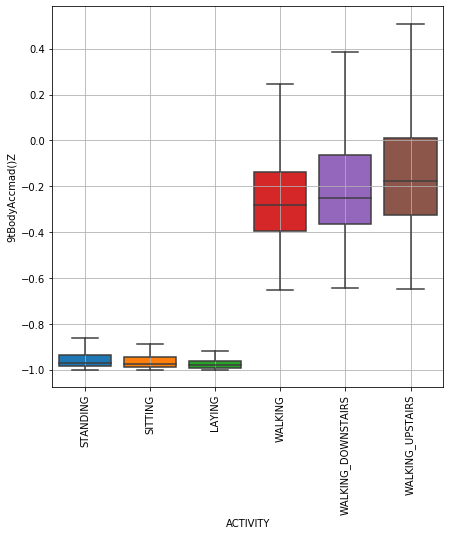

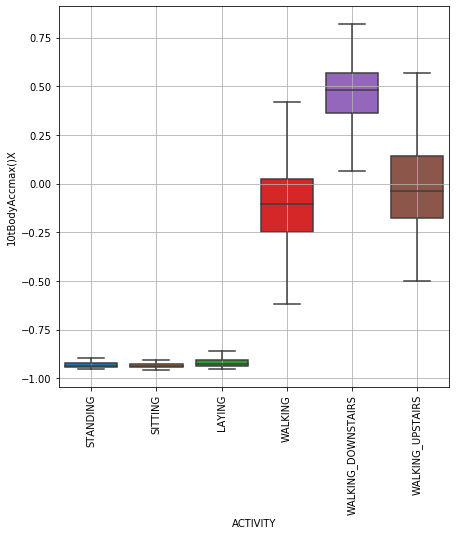

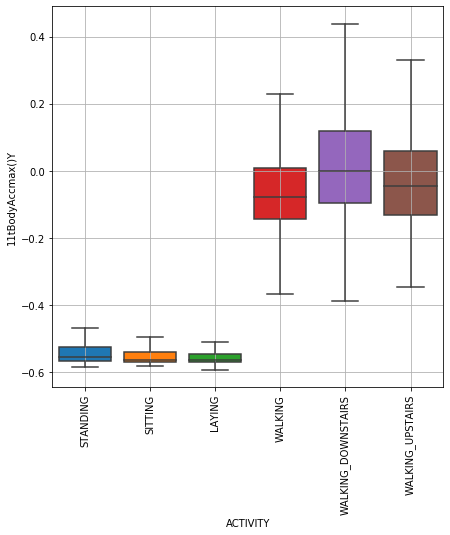

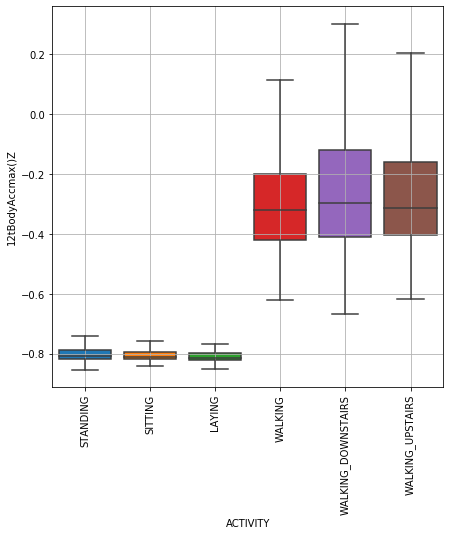

Error in callback <function flush_figures at 0x7fd018b46730> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
import warnings
warnings.filterwarnings('ignore')

for feature in train_df.columns:
  plt.figure(figsize= (7, 7))
  sns.boxplot(x='ACTIVITY', y=feature, data=train_df, showfliers=False, saturation=1)
  plt.xticks(rotation= 90)
  plt.grid()

In [0]:
# Looking at the univariate plotting of 561 domain expert generated features, 
# we can easily see that just by setting some simple thresholds or rule based expressions
# we can classify some of the activittes from the other activities.

### MultiVariate feature analysis (TSNE) over all 561 features

In [0]:
from sklearn.manifold import TSNE

def perform_tsne(x_train, y_train, perplexities, n_iter= 1000):
  for index, per in enumerate(perplexities):
    print('Performing TSNE with perplexity {} and iterations {}'.format(per, n_iter))
    x_reduced= TSNE(verbose= 1, perplexity= per).fit_transform(x_train)
    print('done...')

    df= pd.DataFrame({'x':x_reduced[:,0], 'y':x_reduced[:,1], 'label':y_train})
    print('creating plot for TSNE visualization..')
    plt.figure(figsize= (7, 7))
    sns.lmplot(data= df, x= 'x', y= 'y', hue= 'label', fit_reg=False, size= 8, palette= 'Set1', markers=['^','v','s','o', '1','2'])
    plt.title("perplexity : {} and max_iter : {}".format(per, n_iter))
    img_name = 'tsne' + '_perp_{}_iter_{}.png'.format(per, n_iter)

    print('saving this plot as image in present working directory...')
    plt.savefig(img_name)

In [0]:
y_pre_tsne = train_df['ACTIVITY']
X_pre_tsne = train_df.drop(['LABELS','ACTIVITY'], axis=1)
perform_tsne(X_pre_tsne, y_pre_tsne, perplexities =[2,5,10,20,50])

In [0]:
# After a few TSNE dimentionality reduction techniques, we can aobseve 
# that all other classes are fairly separable instead of Standing and sitting,
# because of similarities in sensor values, as it is expected, because both are static actions 
# and human upper half posture where the sensor is residing(smartphone or wristband) is almost similar.
# Maybe other sensors like heartbeat can help distinguishing
# this because the heartrate is different at resting and standing postures.
# Anyway we can further proceed to machine learning implementations.

# Obtain the training and testing data 

In [0]:
# tablifying file contents into dataframe for exploratory data analysis
import pandas as pd
# reading feature names:
with open(BASEDIR + '/features.txt') as f:
  features= f.readlines()
  # [:-1] used to remove '\n' from the end of each feature
  features= [f[:-1].replace('-', '').replace(' ', '').replace(',', '') for f in features]

train_df= pd.read_csv(BASEDIR + '/train/X_train.txt', delim_whitespace=True, header= None, names= features)
labels= pd.read_csv(BASEDIR + '/train/y_train.txt', delimiter= '\n', header= None)
train_df['LABELS']= labels
activities= {1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'}
train_df['ACTIVITY'] = labels[0].map(activities)

print(train_df.describe())
print(train_df.head(5))
x_train= train_df.drop(['ACTIVITY', 'LABELS'], axis= 1)
y_train= pd.DataFrame(train_df['LABELS'])

       1tBodyAccmean()X  2tBodyAccmean()Y  ...  561angle(ZgravityMean)       LABELS
count       7352.000000       7352.000000  ...             7352.000000  7352.000000
mean           0.274488         -0.017695  ...               -0.056515     3.643362
std            0.070261          0.040811  ...                0.279122     1.744802
min           -1.000000         -1.000000  ...               -1.000000     1.000000
25%            0.262975         -0.024863  ...               -0.143414     2.000000
50%            0.277193         -0.017219  ...                0.003181     4.000000
75%            0.288461         -0.010783  ...                0.107659     5.000000
max            1.000000          1.000000  ...                1.000000     6.000000

[8 rows x 562 columns]
   1tBodyAccmean()X  2tBodyAccmean()Y  ...  LABELS  ACTIVITY
0          0.288585         -0.020294  ...       5  STANDING
1          0.278419         -0.016411  ...       5  STANDING
2          0.279653         -0.019467

In [0]:
# tablifying file contents into dataframe for exploratory data analysis
import pandas as pd
# reading feature names:
with open(BASEDIR + '/features.txt') as f:
  features= f.readlines()
  # [:-1] used to remove '\n' from the end of each feature
  features= [f[:-1].replace('-', '').replace(' ', '').replace(',', '') for f in features]

test_df= pd.read_csv(BASEDIR + '/test/X_test.txt', delim_whitespace=True, header= None, names= features)
labels= pd.read_csv(BASEDIR + '/test/y_test.txt', delimiter= '\n', header= None)
test_df['LABELS']= labels
activities= {1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'}
test_df['ACTIVITY'] = labels[0].map(activities)
print(test_df.describe())
x_test= test_df.drop(['ACTIVITY', 'LABELS'], axis= 1)
y_test= pd.DataFrame(test_df['LABELS'])

       1tBodyAccmean()X  2tBodyAccmean()Y  ...  561angle(ZgravityMean)       LABELS
count       2947.000000       2947.000000  ...             2947.000000  2947.000000
mean           0.273996         -0.017863  ...               -0.048720     3.577876
std            0.060570          0.025745  ...                0.241467     1.740348
min           -0.592004         -0.362884  ...               -0.949228     1.000000
25%            0.262075         -0.024961  ...               -0.098485     2.000000
50%            0.277113         -0.016967  ...               -0.010671     4.000000
75%            0.288097         -0.010143  ...                0.092373     5.000000
max            0.671887          0.246106  ...                0.973113     6.000000

[8 rows x 562 columns]


In [0]:
# We have nearly 70-30 split of the data available for training and testing our models

In [0]:
# for the classification problem, we can use logistic regression, Support Vector Machines, Decision Trees, Random Forests, Gradient boosted Decision Trees, and 

### Generic function to run any model specified

In [0]:
from datetime import datetime
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
activities= {1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'}
model_results= {}
def perform_model(model, x_train, y_train, x_test, y_test, cmap= plt.cm.Greens, modelname= ''):
  start_time= datetime.now()
  print('model name:', modelname)
  print('training the model...')
  model.fit(x_train, y_train)
  print('done training...')
  print('time taken:', datetime.now()- start_time)

  # Predict test data
  print('predicting data...')
  start_time= datetime.now()
  y_pred= model.best_estimator_.predict(x_test)
  accuracy= metrics.accuracy_score(y_true= y_test, y_pred= y_pred)
  predtime= datetime.now() - start_time
  print('prediction time', predtime)
  print('done prediction... accuracy score = {:.2f}'.format(accuracy*100))
  print('drawing confusion matrix...')
  model_results[modelname+ '_test_score']= accuracy * 100
  model_results[modelname+ '_best_param']= model.best_params_
  model_results[modelname+ '_cv_score']= model.best_score_ * 100
  model_results[modelname+ '_prediction_time']= predtime

  # draw confusion matrix
  cm = metrics.confusion_matrix(y_test, y_pred)
  plt.figure(figsize= (7,7))
  sns.heatmap(cm, annot= True, fmt= 'd', cmap= cmap, xticklabels= list(activities.values()), yticklabels= list(activities.values()), )
  plt.title('Confusion Matrix')

  # normalized confusion matrix
  ncm= cm/((cm.sum(axis=1).reshape(-1, 1)))
  plt.figure(figsize= (7,7))
  sns.heatmap(ncm, annot= True, fmt= '.2f', cmap= cmap, xticklabels= list(activities.values()), yticklabels= list(activities.values()), )
  plt.title('Normalized Confusion Matrix')
  plt.plot()

#### Logistic Regression

model name: logistic_regression
training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   30.2s finished


done training...
time taken: 0:00:33.570341
predicting data...
prediction time 0:00:00.010106
done prediction... accuracy score = 95.72
drawing confusion matrix...
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best CV score 93.59


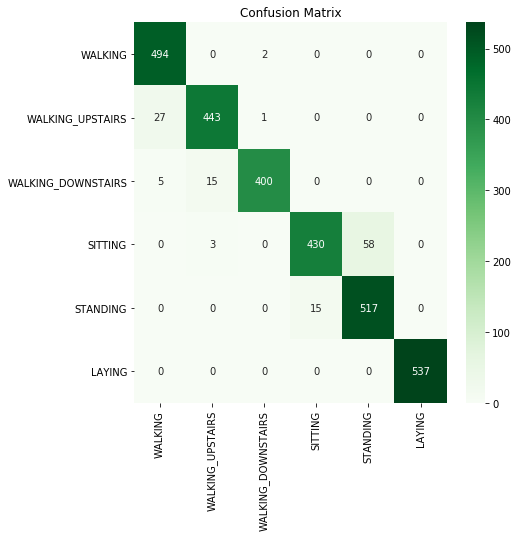

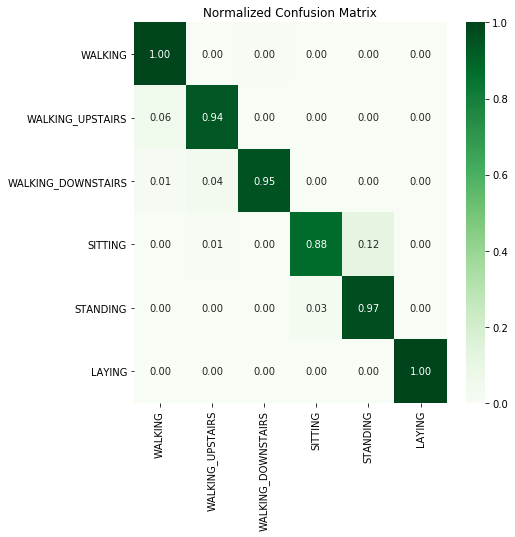

In [0]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV as GS
model_results= {}
# using gridsearchCV for hyperparameter tuning

logistic_regression = linear_model.LogisticRegression()
parameters= {'C': [0.01, 0.1, 1, 10, 20, 30], 'penalty': ['l2', 'l1']}

logistic_regression_grid= GS(logistic_regression, param_grid= parameters, cv= 3, verbose= 1, n_jobs= -1)
perform_model(logistic_regression_grid, x_train, y_train, x_test, y_test, modelname= 'logistic_regression')
print(logistic_regression_grid.best_estimator_)
print('best CV score', '{:.2f}'.format(logistic_regression_grid.best_score_*100))


#### Support Vector Clasifier (LinearSVC)



model name: linear_svc
training the model...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   40.0s finished


done training...
time taken: 0:00:44.218229
predicting data...
prediction time 0:00:00.009040
done prediction... accuracy score = 96.47
drawing confusion matrix...
LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)
best CV score 94.67


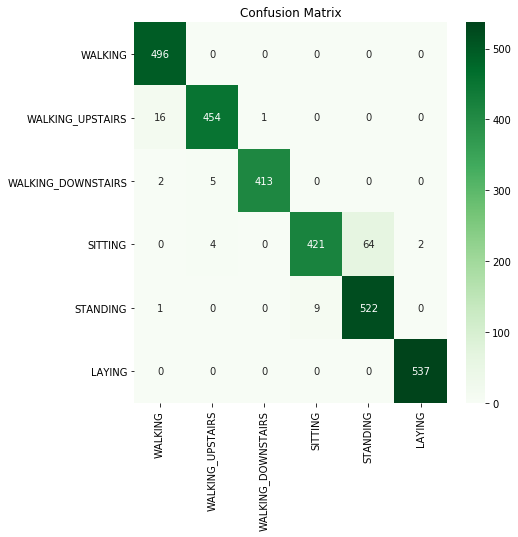

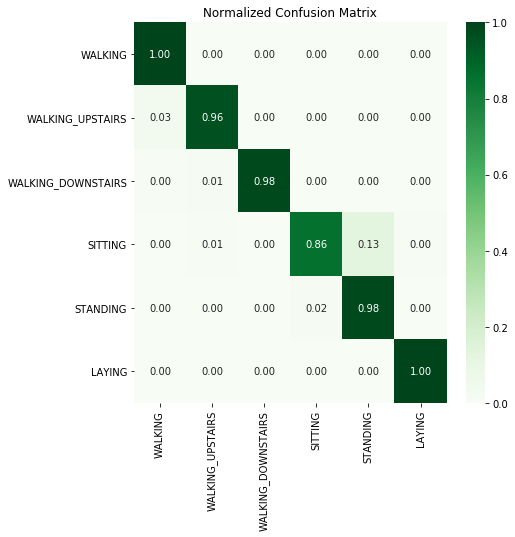

In [0]:
from sklearn.svm import LinearSVC
parameters= {'C': [0.125, 0.5, 1, 2, 8, 16]}
linear_svc= LinearSVC(tol= 0.00005)
grid_linear_svc= GS(linear_svc, param_grid= parameters, cv= 3, n_jobs= -1, verbose= 1)
perform_model(grid_linear_svc, x_train, y_train, x_test, y_test, modelname= 'linear_svc')
print(grid_linear_svc.best_estimator_)
print('best CV score', '{:.2f}'.format(grid_linear_svc.best_score_*100))

#### Support Vector Classifier (rbf kernel)

model name: rbf_svc
training the model...
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 17.2min finished


done training...
time taken: 0:17:13.116996
predicting data...
prediction time 0:00:02.534120
done prediction... accuracy score = 96.23
drawing confusion matrix...
SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best CV score 94.59


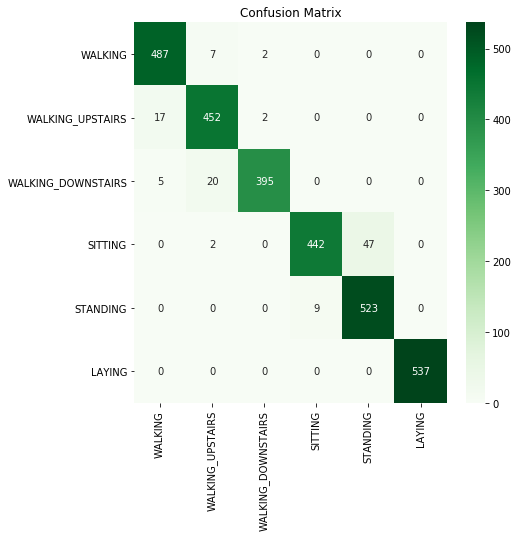

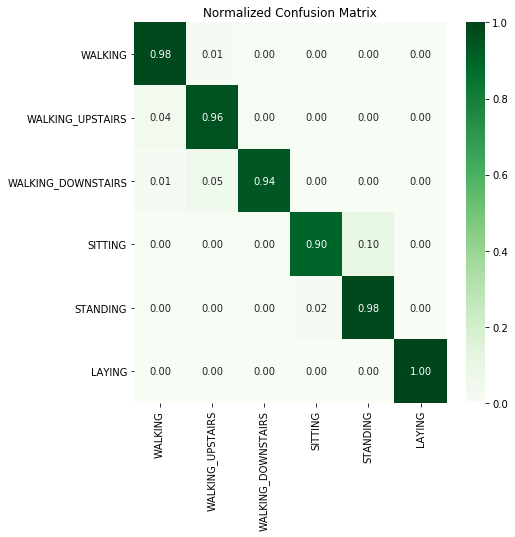

In [0]:
from sklearn.svm import SVC
parameters= {'C': [2, 8, 16], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
rbf_svc= SVC(kernel= 'rbf')
grid_rbf_svc= GS(rbf_svc, param_grid= parameters, n_jobs= -1, verbose= 1)
perform_model(grid_rbf_svc, x_train, y_train, x_test, y_test, modelname= 'rbf_svc')
print(grid_rbf_svc.best_estimator_)
print('best CV score', '{:.2f}'.format(grid_rbf_svc.best_score_*100))

#### Decision Trees

model name: decision_trees
training the model...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   29.4s finished


done training...
time taken: 0:00:32.607081
predicting data...
prediction time 0:00:00.007753
done prediction... accuracy score = 87.75
drawing confusion matrix...
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
best CV score 85.42


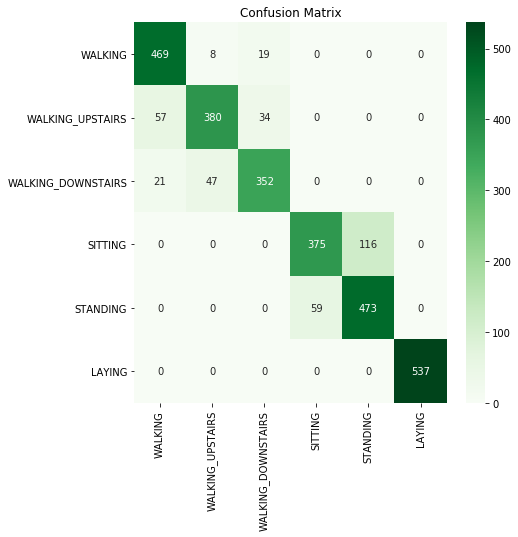

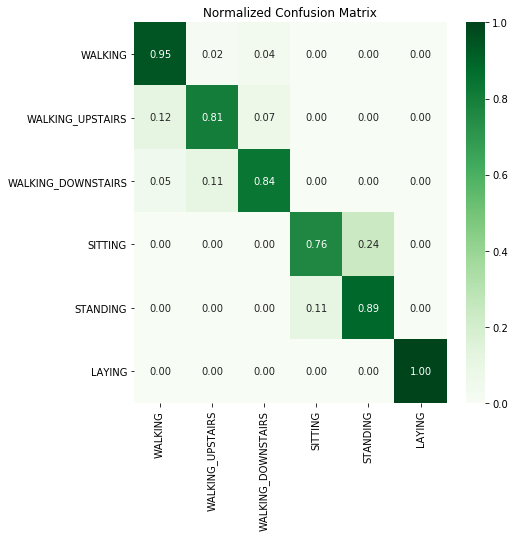

In [0]:
from sklearn.tree import DecisionTreeClassifier
parameters= {'max_depth': np.arange(1, 10, 2)}
dt= DecisionTreeClassifier()
grid_dt= GS(dt, param_grid= parameters, n_jobs= -1, verbose= 1)
perform_model(grid_dt, x_train, y_train, x_test, y_test, modelname= 'decision_trees')
print(grid_dt.best_estimator_)
print('best CV score', '{:.2f}'.format(grid_dt.best_score_*100))

In [0]:
model_results

{'decision_trees_best_param': {'max_depth': 9},
 'decision_trees_cv_score': 85.41994200807449,
 'decision_trees_prediction_time': datetime.timedelta(0, 0, 7753),
 'decision_trees_test_score': 87.75025449609772,
 'linear_svc_best_param': {'C': 2},
 'linear_svc_cv_score': 94.66839857117878,
 'linear_svc_prediction_time': datetime.timedelta(0, 0, 9040),
 'linear_svc_test_score': 96.47098744485918,
 'logistic_regression_best_param': {'C': 1, 'penalty': 'l2'},
 'logistic_regression_cv_score': 93.59375737239,
 'logistic_regression_prediction_time': datetime.timedelta(0, 0, 10106),
 'logistic_regression_test_score': 95.72446555819477,
 'rbf_svc_best_param': {'C': 8, 'gamma': 0.01},
 'rbf_svc_cv_score': 94.58717055823008,
 'rbf_svc_prediction_time': datetime.timedelta(0, 2, 534120),
 'rbf_svc_test_score': 96.23345775364778}

#### Random Forest

model name: random_forest
training the model...
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.4min finished


done training...
time taken: 0:22:31.378775
predicting data...
prediction time 0:00:00.063133
done prediction... accuracy score = 91.52
drawing confusion matrix...
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best CV score 92.07


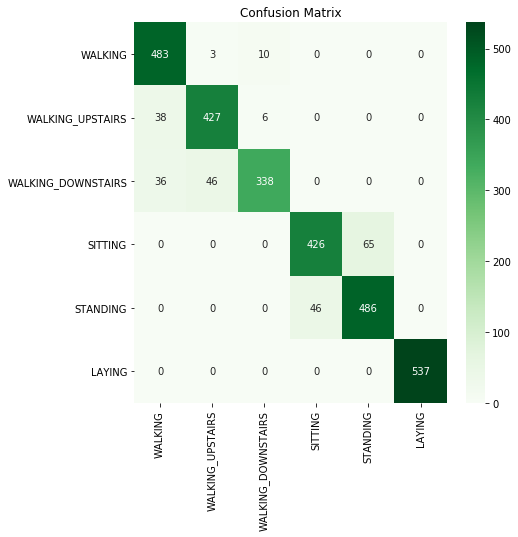

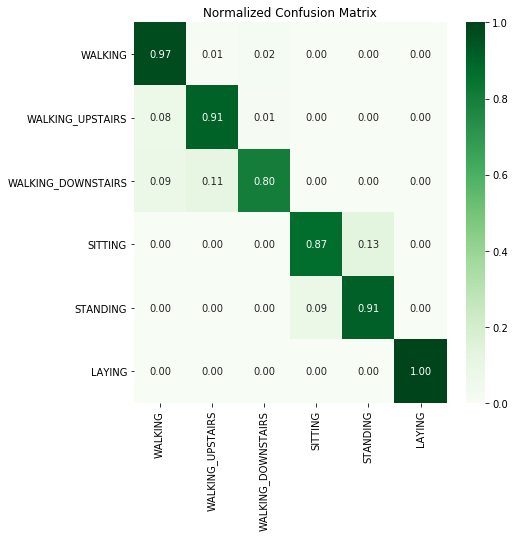

In [0]:
from sklearn.ensemble import RandomForestClassifier
parameters= {'n_estimators': np.arange(10, 201, 20), 'max_depth': np.arange(3, 15, 2)}
rfc= RandomForestClassifier()
grid_rfc= GS(rfc, param_grid= parameters, verbose= 1, n_jobs= -1)
perform_model(grid_rfc, x_train, y_train, x_test, y_test, modelname= 'random_forest')
print(grid_rfc.best_estimator_)
print('best CV score', '{:.2f}'.format(grid_rfc.best_score_*100))

#### Gradient Boosted Decision Trees

model name: GBDT
training the model...
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 157.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 433.5min finished


done training...
time taken: 7:28:00.013807
predicting data...
prediction time 0:00:00.055808
done prediction... accuracy score = 93.96
drawing confusion matrix...
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=130,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
best CV score 90.19


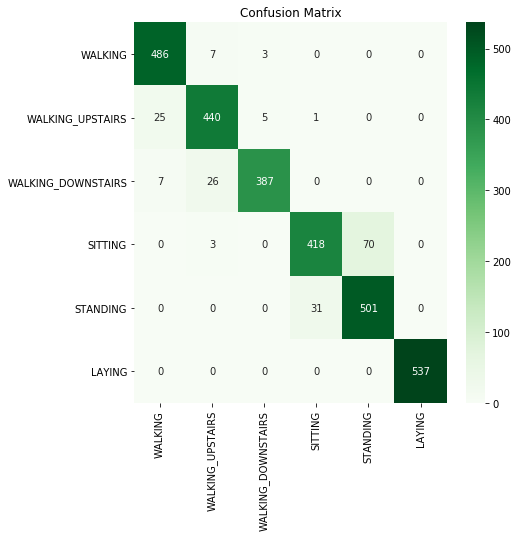

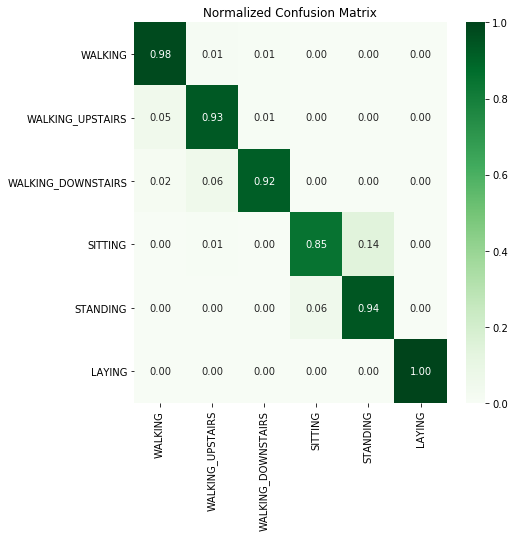

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid= {'max_depth': np.arange(5,10,1), 'n_estimators': np.arange(150, 180, 10)}
gbdt= GradientBoostingClassifier()
grid_gbdt= GS(gbdt, param_grid= parameters, cv=2, verbose= 1, n_jobs= -1)
perform_model(grid_gbdt, x_train, y_train, x_test, y_test, modelname= 'GBDT')
print(grid_gbdt.best_estimator_)
print('best CV score', '{:.2f}'.format(grid_gbdt.best_score_*100))

#### Comparing all models

In [0]:
model_results

In [0]:
from prettytable import PrettyTable
x= PrettyTable(['Model', 'Best Parameters', 'CV Score', 'Val Score', 'Prediction Time'])
x.add_row(['Logistic Regression', 
           model_results['logistic_regression_best_param'], 
           '{:.2f}'.format(model_results['logistic_regression_cv_score']), 
           '{:.2f}'.format(model_results['logistic_regression_test_score']), 
           model_results['logistic_regression_prediction_time']])

x.add_row(['Support Vector Classifier(linear)', 
           model_results['linear_svc_best_param'], 
           '{:.2f}'.format(model_results['linear_svc_cv_score']), 
           '{:.2f}'.format(model_results['linear_svc_test_score']), 
           model_results['linear_svc_prediction_time']])

x.add_row(['Support Vector Classifier(rbf)', 
           model_results['rbf_svc_best_param'], 
           '{:.2f}'.format(model_results['rbf_svc_cv_score']), 
           '{:.2f}'.format(model_results['rbf_svc_test_score']), 
           model_results['rbf_svc_prediction_time']])

x.add_row(['Random Forest', 
           model_results['random_forest_best_param'], 
           '{:.2f}'.format(model_results['random_forest_cv_score']), 
           '{:.2f}'.format(model_results['random_forest_test_score']), 
           model_results['random_forest_prediction_time']])

x.add_row(['Decision Trees', 
           model_results['decision_trees_best_param'], 
           '{:.2f}'.format(model_results['decision_trees_cv_score']), 
           '{:.2f}'.format(model_results['decision_trees_test_score']), 
           model_results['decision_trees_prediction_time']])

x.add_row(['Gradient Boosted Decision Trees', 
           model_results['GBDT_best_param'], 
           '{:.2f}'.format(model_results['GBDT_cv_score']), 
           '{:.2f}'.format(model_results['GBDT_test_score']), 
           model_results['GBDT_prediction_time']])

x.align["Model"], x.align["Best Parameters"] = "l", 'l'

print(x)



+-----------------------------------+---------------------------------------+----------+-----------+-----------------+
| Model                             | Best Parameters                       | CV Score | Val Score | Prediction Time |
+-----------------------------------+---------------------------------------+----------+-----------+-----------------+
| Logistic Regression               | {'C': 1, 'penalty': 'l2'}             |  93.59   |   95.72   |  0:00:00.010106 |
| Support Vector Classifier(linear) | {'C': 2}                              |  94.67   |   96.47   |  0:00:00.009040 |
| Support Vector Classifier(rbf)    | {'C': 8, 'gamma': 0.01}               |  94.59   |   96.23   |  0:00:02.534120 |
| Random Forest                     | {'max_depth': 7, 'n_estimators': 130} |  92.07   |   91.52   |  0:00:00.063133 |
| Decision Trees                    | {'max_depth': 9}                      |  85.42   |   87.75   |  0:00:00.007753 |
| Gradient Boosted Decision Trees   | {'max_dept